# Library

In [ ]:
# library import
#loading dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
# data preprocessing
from sklearn.preprocessing import StandardScaler , OneHotEncoder, LabelEncoder
# data splitting
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
# data modeling
from sklearn.metrics import precision_score , recall_score , f1_score , accuracy_score, classification_report , confusion_matrix, ConfusionMatrixDisplay,roc_curve
from sklearn.model_selection import cross_val_predict , GridSearchCV, learning_curve, cross_val_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
import itertools
from sklearn.feature_selection import SelectKBest , f_regression

# Data

Dataset : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

In [ ]:
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSlKqtz5CEcdq3-untwM9K62WR0qDzra67zvTs_z4qY7UmYBHTKua2fZ3ARfkFHMQYeriVKWO_VcKfP/pub?output=csv"
df = pd.read_csv(url)

# Menampilkan lima baris pertama dari DataFrame
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Informasi mengenai Dataset :
* age = Usia
* sex = Jenis kelamin
* cp = Jenis nyeri dada (4 nilai) = Rentang 0 - 3 seberapa nyeri dada pasien
* trestbps = Tekanan darah saat istirahat (Satuan dalam mmHg )
* chol = Kadar Kolestrol serum dalam mg/dl
* fbs = Gula darah puasa > 120 mg/dl ? (1 = Ya, 0 = Tidak)
* restecg = Hasil elektrokardiografi setelah istirahat (nilai 0,1,2)
* thalach = Detak jantung maksimum yang dicapai
* exang = Mengalami angin setelah berolahraga? (1= Ya, 0 = Tidak)
* oldpeak = Depresi Segmen ST yang disbebakan oleh olahraga relatif terhadap istirahat
*slope = Gradien/Kemiringan Segmen ST
* ca = Jumlah pembuluh darah utama (0-3) yang diwarnai dengan flourosopi
* thal = Penyakit Menurun/Genetik Thalasemia : 1 = normal; 2 = cacat ; 3 = cacat yang dapat diperbaiki(carrier)
* target = 1(Ada Penyakit Jantung) / 0(Tidak Ada Penyakit Jantung)

# EDA

In [ ]:
# Mengetahui baris dan kolom pada data
r,c = df.shape
print('Data memiliki {} baris dan {} kolom'.format(r,c))

Data memiliki 1025 baris dan 14 kolom


In [ ]:
# Mengetahui keunikan atau ragam data pada setiap kolomnya
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [ ]:
# Info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Missing value

In [ ]:
# Mengecek Missing Value
missing_values = df.isnull().sum()
missing_percent = missing_values / len(df)
missing_data_info = pd.DataFrame({
    'Column Name': df.columns,
    'Missing Values': missing_values,
    'Missing Values (%)': missing_percent
})
print(missing_data_info)

         Column Name  Missing Values  Missing Values (%)
age              age               0                 0.0
sex              sex               0                 0.0
cp                cp               0                 0.0
trestbps    trestbps               0                 0.0
chol            chol               0                 0.0
fbs              fbs               0                 0.0
restecg      restecg               0                 0.0
thalach      thalach               0                 0.0
exang          exang               0                 0.0
oldpeak      oldpeak               0                 0.0
slope          slope               0                 0.0
ca                ca               0                 0.0
thal            thal               0                 0.0
target        target               0                 0.0


## Duplicate

In [ ]:
# Mengecek data Duplicates
duplicate_rows = df[df.duplicated()]
print("Data duplikat:")
duplicate_rows.head(3000).count()

Data duplikat:


age         723
sex         723
cp          723
trestbps    723
chol        723
fbs         723
restecg     723
thalach     723
exang       723
oldpeak     723
slope       723
ca          723
thal        723
target      723
dtype: int64

In [ ]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
# Mengecek Duplikat data dan distinct row
distinct_count = len(df.drop_duplicates())
duplicate_count = len(df) - distinct_count
f'{distinct_count} baris berbeda {duplicate_count} baris yang terduplikat'

'302 baris berbeda 723 baris yang terduplikat'

Total Variance Sebelum Penghapusan Data Duplikat:
age           82.306450
sex            0.211944
cp             1.060160
trestbps     306.835410
chol        2661.787109
fbs            0.127111
restecg        0.278655
thalach      529.263325
exang          0.223514
oldpeak        1.380750
slope          0.381622
ca             1.062544
thal           0.385219
target         0.250071
dtype: float64

Total Variance Setelah Penghapusan Data Duplikat:
age           81.865757
sex            0.217553
cp             1.065114
trestbps     308.472817
chol        2678.423588
fbs            0.127225
restecg        0.276705
thalach      524.571561
exang          0.221084
oldpeak        1.348971
slope          0.379794
ca             1.013542
thal           0.375800
target         0.248971
dtype: float64


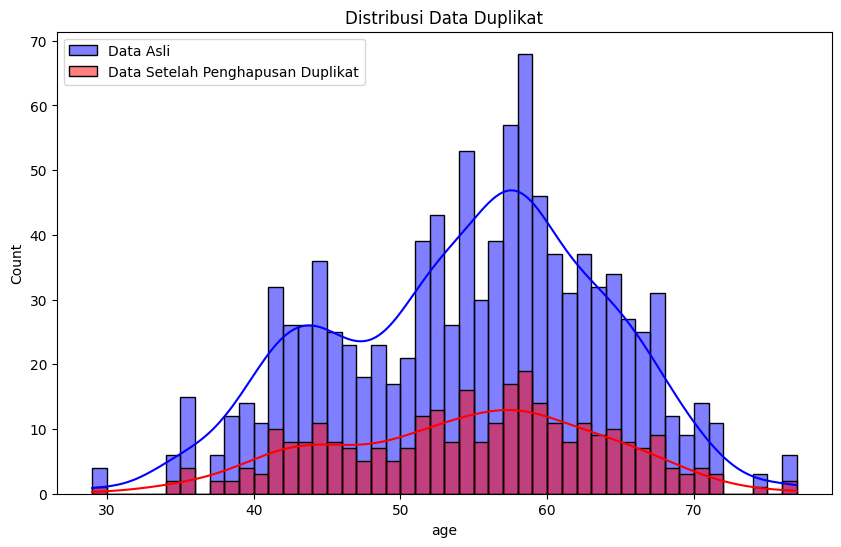

In [ ]:
# Menghitung total variance sebelum penghapusan data duplikat
variance_before = df.var()

# Menghapus data duplikat
df_no_duplicates = df.drop_duplicates()

# Menghitung total variance setelah penghapusan data duplikat
variance_after = df_no_duplicates.var()

# Menampilkan total variance sebelum dan sesudah penghapusan data duplikat
print("Total Variance Sebelum Penghapusan Data Duplikat:")
print(variance_before)
print("\nTotal Variance Setelah Penghapusan Data Duplikat:")
print(variance_after)

# Visualisasi data duplikat
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=range(df['age'].min(), df['age'].max() + 1), ax=ax, kde=True, color='blue', label='Data Asli')
sns.histplot(data=df_no_duplicates, x='age', bins=range(df['age'].min(), df['age'].max() + 1), ax=ax, kde=True, color='red', label='Data Setelah Penghapusan Duplikat')
plt.title('Distribusi Data Duplikat')
plt.legend()
plt.show()

**Analisis**
***
Dari beberapa pengecekan Duplicate value di atas, pada dataset Health terdapat 723 baris/data yang duplikat dari total 1025 data. Maka diperlukan tahapan penanganan yaitu menggunakan drop. Ppada histogram yang telah ditampilkan menyatakan bahwa tidak ada perubahan yang cukup signifikan antara sebelum dah sesudah dilakukan drop atau penghapusan duplikat walaupun pada perhitungan variance perubahannya tidak terlalu banyak. Sehingga merupakan keputusan yang tepat untuk dilakukan drop.

In [ ]:
# Duplicate value: Mencari duplicate value dan menyelesaikan masalah duplicate value jika ada
duplicate_value = df.duplicated().sum()
print("Jumlah Duplicate Value:", duplicate_value)

# Mengatasi duplicate value
df = df.drop_duplicates()
print("Duplicate Value Setelah di Drop:", df.duplicated().sum())


Jumlah Duplicate Value: 723
Duplicate Value Setelah di Drop: 0


## Statistik deskriptif

In [ ]:
# Statistik deskriptif
df.select_dtypes(exclude='object').describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Outlier

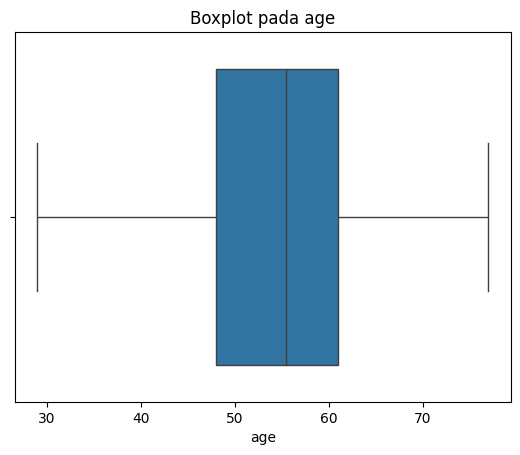

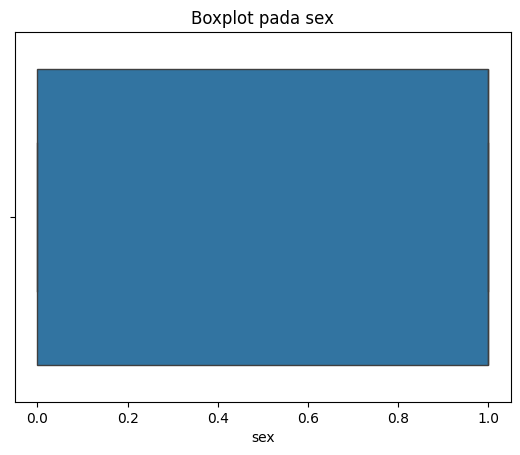

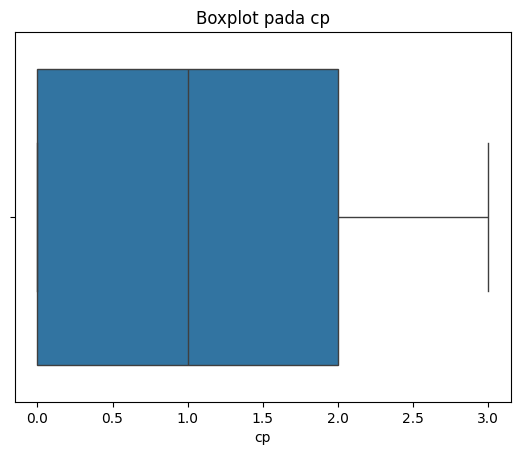

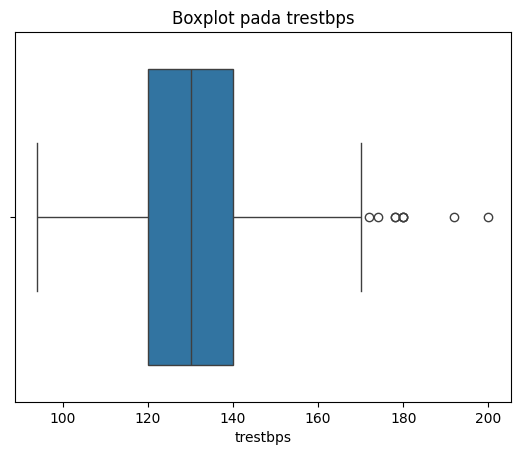

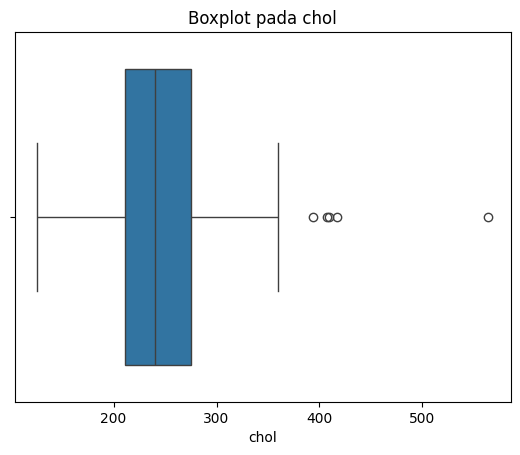

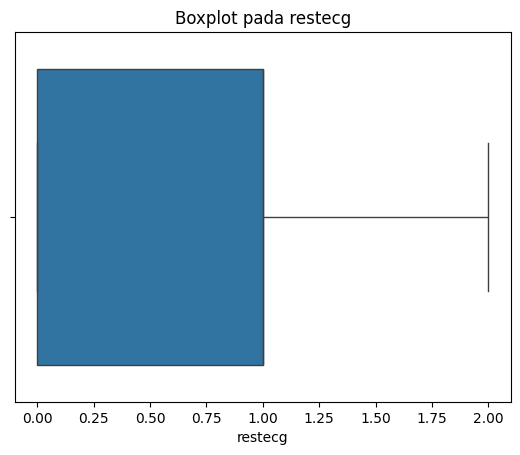

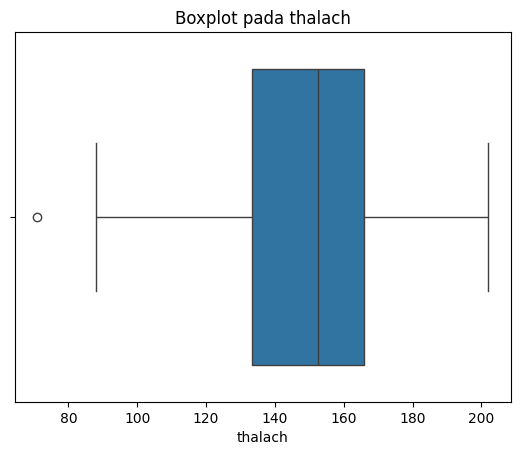

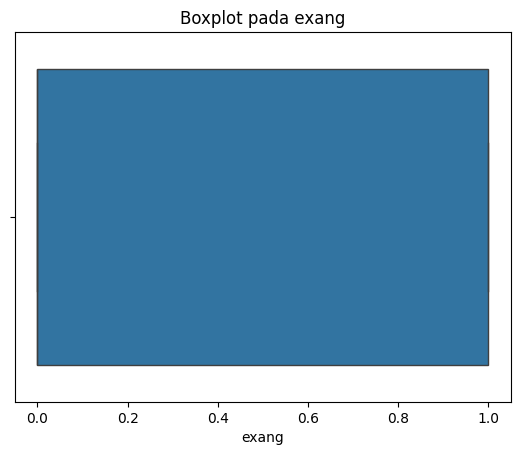

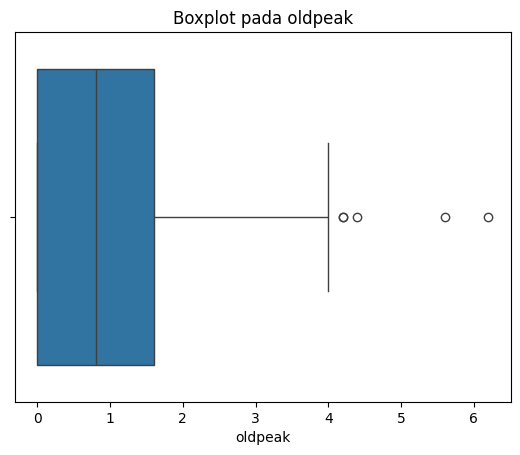

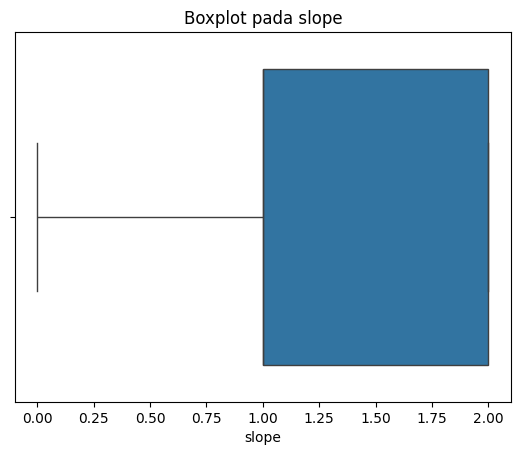

In [ ]:
# List variabel untuk membuat boxplot
numerical_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope']

# Boxplot dari masing masing feature untuk mengecek outlier
for feature in numerical_features:
    sns.boxplot( x=df[feature], data=df)
    plt.title(f'Boxplot pada {feature}')
    plt.show()

In [ ]:
# Outlier: Memeriksa outlier dan menangani outlier jika ada
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: df[col].median() if x < lower_bound or x > upper_bound else x)

print("Outlier:")
for col in numerical_columns:
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    if not outliers.empty:
        print(f"Outlier '{col}':")
        print(outliers)
    else:
        print(f"Tidak ada '{col}'")

print(df)

Outlier:
Outlier 'age':
     age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0     125.0  212.0    0        1    168.0      0      1.0   
1     53    1   0     140.0  203.0    1        0    155.0      1      3.1   
2     70    1   0     145.0  174.0    0        1    125.0      1      2.6   
3     61    1   0     148.0  203.0    0        1    161.0      0      0.0   
4     62    0   0     138.0  294.0    1        1    106.0      0      1.9   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
723   68    0   2     120.0  211.0    0        0    115.0      0      1.5   
733   44    0   2     108.0  141.0    0        1    175.0      0      0.6   
739   52    1   0     128.0  255.0    0        1    161.0      1      0.0   
843   59    1   3     160.0  273.0    0        0    125.0      0      0.0   
878   54    1   0     120.0  188.0    0        1    113.0      0      1.4   

     slope  ca  thal  target  
0        2   2     3

## Imbalance

In [ ]:
# Cek Imbalance
print(df['target'].value_counts())

target
1    164
0    138
Name: count, dtype: int64


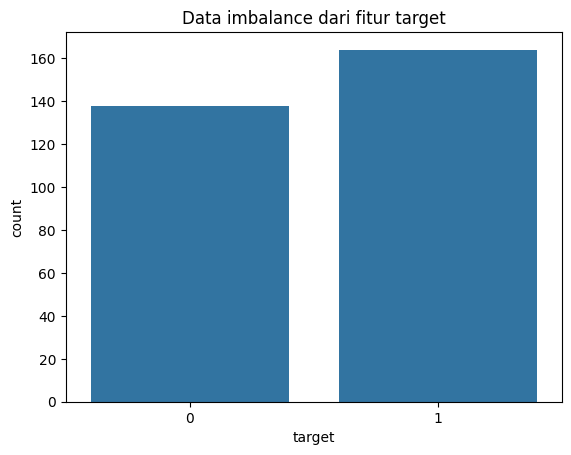

In [ ]:
sns.countplot(x='target', data=df)
plt.title('Data imbalance dari fitur target')
plt.show()

**Insight**
***
Dari hasil di atas menunjukkan 0 merupakan orang yang tidak memiliki penyakit jantung, dan 1 merupakan orang yang memiliki penyakit jantung. Didapat bahwa jumlah keduanya tidak jauh berbeda, walaupun tidak sama, data ini bisa dikatakan sudah seimbang.

# Visualisasi

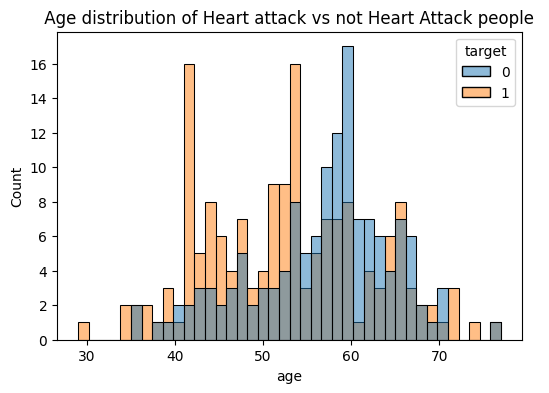

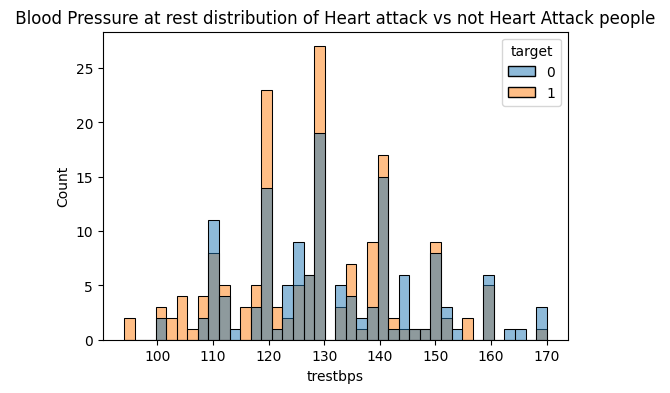

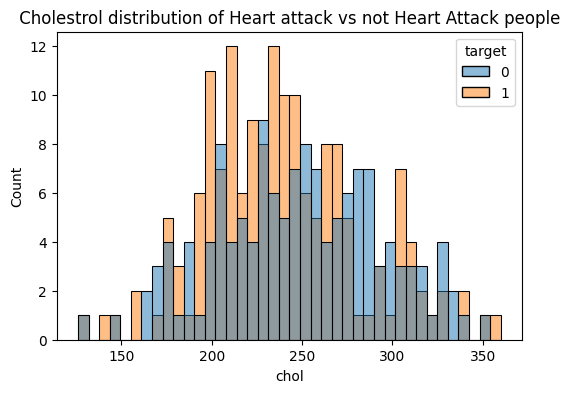

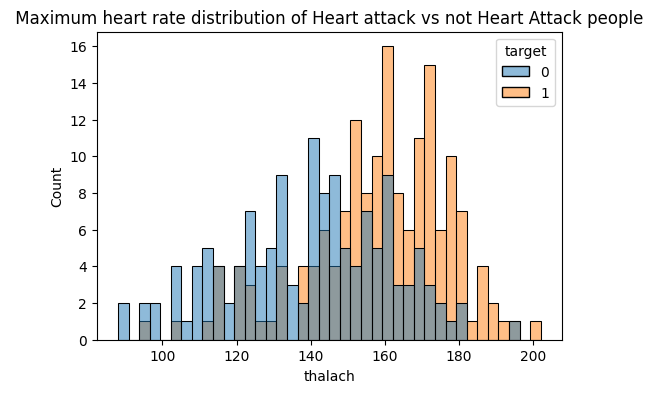

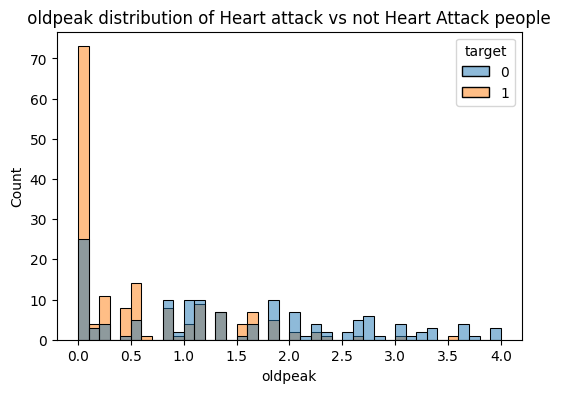

In [ ]:
Dictionary={"age":"Age" , "trestbps":"Blood Pressure at rest" , "chol":"Cholestrol", "thalach":"Maximum heart rate" , "oldpeak":"oldpeak"}
for col in df[["age" ,"trestbps" ,  "chol" , "thalach" , "oldpeak"]]:
    plt.figure(figsize=(6 , 4))
    sns.histplot(x=col, data=df , bins=40  , hue="target")
    plt.title(f" {Dictionary[col]} distribution of Heart attack vs not Heart Attack people ")
    plt.show()

<Axes: >

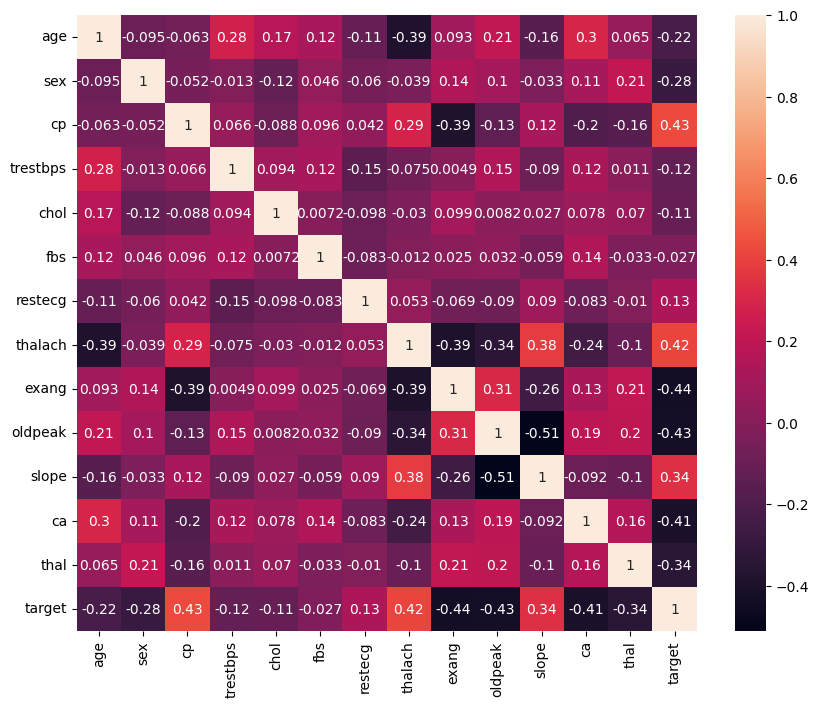

In [ ]:
plt.figure(figsize=(10 , 8))
sns.heatmap(df.corr() , annot=True)

**Insight**
***
Dalam bagian visualisasi terdapat diagram yang menunjukkan hubungan antar fitur dengan penyakit jantung. Selain itu juga ditampilkan visualisasi berupa korelasi antar fitur yang ada pada dataset.

# Machine Learning

1. Peserta mampu melakukan determinasi machine learning model mana yang relevan sesuai dengan dataset yang telah dipilih dengan problem understanding yang telah dilakukan sebelumnya.
2. Peserta mampu menyajikan alasan penggunaan machine learning model pada poin 1.
3. Peserta dapat melakukan eksekusi coding machine learning model yang telah ditentukan pada poin 1 dengan tepat sesuai urutan yang tepat.

**Alasan memilih**
***
Sebelumnya saya telah melakukan uji pada 6 model supervised learning yaitu Logistic Regression, Naive Bayes,	Random Forest,	K-Nearest Neighbour(KNN),	Decision Tree, dan	Support Vector Machine(SVM). Dari keenam model ini menghasilkan accuracy yang berbeda-beda yang bisa saya jabarkan sebagai berikut :
1. Logistic Regression	80.327869
2. Naive Bayes	78.688525
3. Random Forest	81.967213
4. K-Nearest Neighbour	81.967213
5. Decision Tree	78.688525
6. Support Vector Machine	81.967213

Dari hasil tersebut di dapatkan Random Forest, KNN, dan SVM dengan accuracy tertinggi yaitu 81.967213. Dari sini saya memutuskan untuk memilih SVM sebagai model dari dataset Hearth Disease sebab performa yang lebih baik dalam menangani data dengan dimensi tinggi, lebih tahan terhadap outlier, dan lebih mudah diinterpretasikan.

Untuk collab uji ini bisa dilihat secara langsung pada : https://colab.research.google.com/drive/1gvZAE3NbgSUclXq78dC0vZckF1aF_p16?usp=sharing

In [ ]:
# Pra-pemrosesan data
X = df.drop('target', axis=1)  # fitur-fitur
y = df['target']  # target

# Pembagian data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Membuat model SVM
svm_model = SVC()

# Cross Vallidation

4. Peserta mampu menerapkan cross-validation basic dari machine learning model yang telah dibuat sebelumnya.
5. Peserta dapat menjelaskan hasil dari cross-validation basic yang telah dihasilkan sebelumnya pada poin 4.

In [ ]:
# Cross-validation dengan 5-fold
cv_scores = cross_val_score(svm_model, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.61290323 0.70967742 0.6        0.63333333 0.66666667 0.83333333
 0.6        0.6        0.63333333 0.63333333]
Mean CV Accuracy: 0.6522580645161289


**Insight**
***
Berdasarkan Cross validation yang telah dilakukan didapatkan scores :
1. 0.61290323
2. 0.70967742
3. 0.6        
4. 0.63333333
5. 0.66666667
6. 0.83333333
7. 0.6        
8. 0.6        
9. 0.63333333
10. 0.63333333

Dan diperoleh rata-rata sebesar : 0.6522580645161289

# Hyperparameter

6. Peserta mampu menerapkan learning curves dari machine learning model yang telah dibuat sebelumnya serta membuat visualisasi hasil dari learning curves yang dihasilkan.
7. Peserta dapat menjelaskan hasil dari visualisasi learning curves yang telah dihasilkan sebelumnya pada poin 6.
8. Peserta mampu memperbaiki akurasi machine learning modul yang telah dibuat menggunakan hyperparameter tuning dan juga bootstrapping, jika ada.
9. Peserta dapat mengukur model yang dibuat dengan metric evaluation yang sesuai dengan machine learning model yang telah dibuat sebelumnya dan yang terbaik untuk menyelesaikan masalah.
10. Peserta dapat memberikan interpretasi dari hasil metric evaluation serta alasan pemilihan metric yang dipilih pada poin 9.

In [ ]:
# Define grid of hyperparameters
param_grid = {
    'C': [0.0001, 0.001, 0.01],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)


Best Hyperparameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


**Alasan memilih**
***
Saya memilih untuk menggunakan Grid search sebab merupakan algoritma lengkap yang dapat menemukan kombinasi terbaik dari hyperparameter.

**Analisis**
***
Dari hasil cross-validation, terlihat bahwa kombinasi hyperparameter terbaiknya adalah C=0.01, gamma='scale', dan kernel='linear'.

C = 0.01: Nilai C yang rendah (0.01) menunjukkan bahwa model lebih memilih untuk memiliki margin yang lebih besar, jadi memungkinkan untuk mendapatkan hasil yang lebih umum.

Gamma = 'scale': Menandakan bahwa gamma akan dihitung sebagai 1 / (n_features * X.var()) di mana X adalah data pelatihan.

Kernel = 'linear': Di sini, model dengan kernel linear dipilih sebagai yang terbaik, menunjukkan bahwa data mungkin memiliki struktur linier yang cukup baik dan kompleksitas model yang lebih rendah mungkin lebih efektif.

In [ ]:
# Cross-validation dengan 5-fold
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.80645161 0.87096774 0.8        0.8        0.83333333 0.93333333
 0.73333333 0.8        0.73333333 0.83333333]
Mean CV Accuracy: 0.8144086021505377


**Analisis**
***
Setelah dilakukan Hyperparameter dan selanjutnya dilakukan Cross Validation kembali, didapatkan scores :
1. 0.80645161
2. 0.87096774
3. 0.8        
4. 0.8        
5. 0.83333333
6. 0.93333333
7. 0.73333333
8. 0.8        
9. 0.73333333
10. 0.83333333

Dan dengan rata-rata accuracy : 0.8144086021505377. Dapat dilihat terdapat peningkatan rata-rata accuracy dary cross validation sebelumnya yaitu 0.6522580645161289.

# Matric Evaluation

Akurasi: 82.42%

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.80        48
           1       0.74      0.98      0.84        43

    accuracy                           0.82        91
   macro avg       0.85      0.83      0.82        91
weighted avg       0.86      0.82      0.82        91



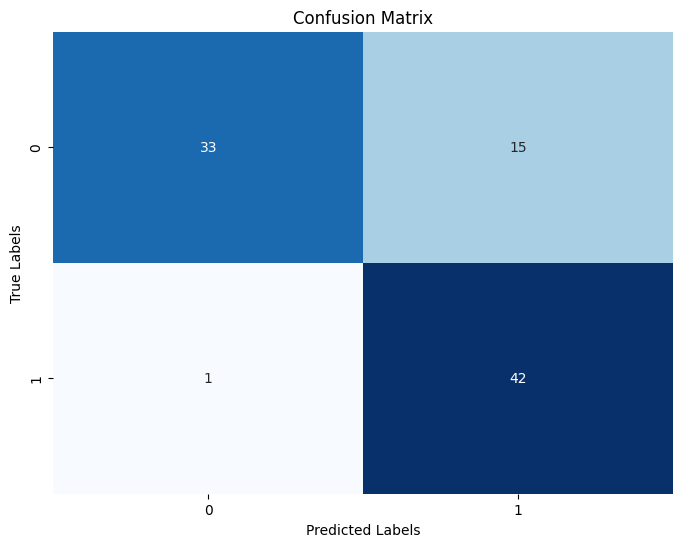

In [ ]:
# Membuat model SVM dengan parameter terbaik dari grid search
best_svm_model = grid_search.best_estimator_

# Melatih model
best_svm_model.fit(X_train, y_train)

# Membuat prediksi
predictions = best_svm_model.predict(X_test)

# Evaluasi model
akurasi = accuracy_score(y_test, predictions) * 100
print(f"Akurasi: {akurasi:.2f}%")

# Metrics Evaluation
print("\nClassification Report:")
print(classification_report(y_test, predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Analisis**
***
Telah dilakukan pelatihan model, dan mengevaluasinya menggunakan matric evaluation dan menghasilkan accuracy sebesar 82,42%

kelas 0 (Pasien Tidak Memiliki Penyakit Jantung), precision 0.97, recall 0.69, dan F1-score 0.80.
kelas 1 (Pasien Memiliki Penyakit Jantung), precision 0.74, recall 0.98, dan F1-score 0.84.

Pada kelas 0 menunjukkan tingkat precision yang tinggi untuk mengklasifikasikan pasien yang tidak memiliki penyakit jantung, tetapi recall yang lebih rendah, yang berarti model cenderung melewatkan beberapa pasien yang sebenarnya tidak memiliki penyakit jantung.
Pada kelas 1 menunjukkan bahwa tingkat recall yang tinggi untuk mengklasifikasikan pasien yang memiliki penyakit jantung, tetapi precision yang sedikit lebih rendah, yang berarti ada beberapa kasus di mana model memprediksi pasien memiliki penyakit jantung ketika sebenarnya tidak.

Kita dapat melihat bahwa kelas 0 memiliki support sebanyak 48 dan kelas 1 memiliki support sebanyak 43.

**Alasan memilih**
***

Metric evaluation yang dipilih adalah akurasi (accuracy), precision, recall, dan F1-score.Saya pemilihan metric evaluation ini sebab

Akurasi memberikan gambaran umum tentang seberapa baik model dapat mengklasifikasikan data dan semakin tinggi akurasi, semakin baik model dalam melakukan prediksi secara keseluruhan.

Precision, Recall, dan F1-score yang dapat memberikan info rinci pada model yang sedang diuji.
Interpretasi secara Keseluruhan:

Akurasi, precision, recall, dan F1-score, saling melengkapi dan bisa menjadi sebuah pertimbangan pada suatu model sebab memiliki akurasi yang tinggi tapi nilai yang lain rendah belum tentu model tersebut baik, begitu pula sebaliknya. Dengan begitu, mempertimbangkan semua metrik evaluasi secara keseluruhan, kita dapat membuat keputusan yang lebih baik tentang kinerja dan kecocokan model untuk masalah yang dihadapi.

# Learning Curves

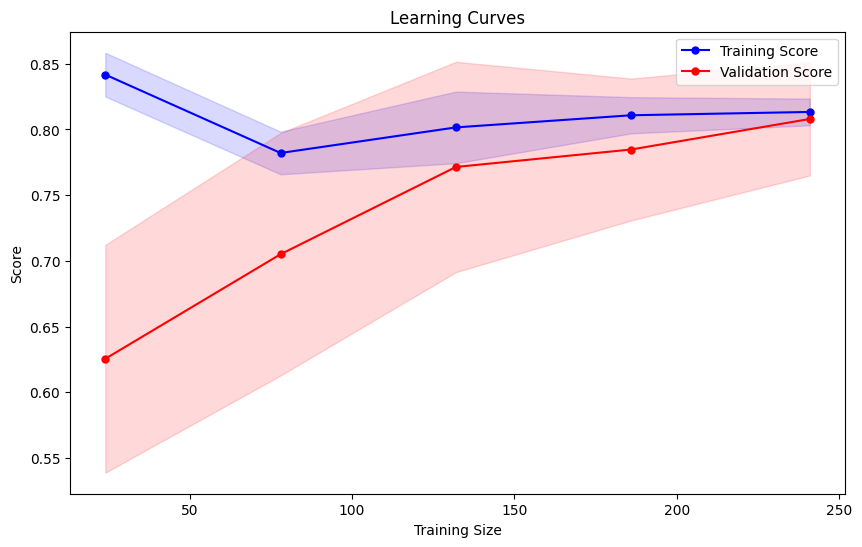

In [ ]:
# Learning Curves
train_sizes, train_scores, test_scores = learning_curve(best_svm_model, X, y, cv=5)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue',marker='o', markersize=5)
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='red',marker='o', markersize=5)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='red')
plt.title('Learning Curves')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.legend()
plt.show()

**Analisis**
***
Hasil Learning Curve didapat bahwa score training lebih tinggi dari score validation dan hal tersebut baik karena menandakan tidak terdapat overfitting. Selain itu, jarak antara kedua kurva tidak terlalu jauh yang menandakan kurva ini cukup baik.

# Exploration for Model

In [ ]:
# Function to train and evaluate SVM models
def train_evaluate_SVM(X_train, y_train, X_test, y_test, kernel, param_grid):
    # Initialize SVM model
    svm_model = SVC(kernel=kernel)

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Evaluating the model on test data
    y_pred_test = grid_search.best_estimator_.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    # Print exploration results
    print(f"\nExploration for Model with {kernel} kernel:")
    print("Best Parameters:", grid_search.best_params_)
    print(f"Best Accuracy (Train): {grid_search.best_score_ * 100:.2f}%")

    # Print evaluation results
    print("\nEvaluation for Model:")
    print(f"Accuracy (Test Data): {accuracy_test * 100:.2f}%")

# Model 1: SVM with linear kernel
param_grid_linear = {'C': [0.1, 1, 10]}
train_evaluate_SVM(X_train, y_train, X_test, y_test, 'linear', param_grid_linear)

# Model 2: SVM with RBF kernel
param_grid_rbf = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]}
train_evaluate_SVM(X_train, y_train, X_test, y_test, 'rbf', param_grid_rbf)

# Model 3: SVM with polynomial kernel
param_grid_poly = {'C': [0.1, 1, 10], 'degree': [2, 3, 4]}
train_evaluate_SVM(X_train, y_train, X_test, y_test, 'poly', param_grid_poly)



Exploration for Model with linear kernel:
Best Parameters: {'C': 1}
Best Accuracy (Train): 81.08%

Evaluation for Model:
Accuracy (Test Data): 84.62%

Exploration for Model with rbf kernel:
Best Parameters: {'C': 1, 'gamma': 0.01}
Best Accuracy (Train): 81.54%

Evaluation for Model:
Accuracy (Test Data): 83.52%

Exploration for Model with poly kernel:
Best Parameters: {'C': 1, 'degree': 3}
Best Accuracy (Train): 77.29%

Evaluation for Model:
Accuracy (Test Data): 76.92%


**Analisis**
***
Dilakukan Exploration Model yang didapat :
Dengan kernel linear didapat :
Best Parameters: {'C': 1}
Best Accuracy (Train): 81.08%
Evaluation for Model:
Accuracy (Test Data): 84.62%

Dengan kernel rbf didapat :
Best Parameters: {'C': 1, 'gamma': 0.01}
Best Accuracy (Train): 81.54%
Evaluation for Model:
Accuracy (Test Data): 83.52%

Dengan kernel poly didapat :
Best Parameters: {'C': 1, 'degree': 3}
Best Accuracy (Train): 77.29%
Evaluation for Model:
Accuracy (Test Data): 76.92%

Terdapat sedikit perbedaan antara akurasi model pada data pelatihan dan data uji dengan penggunaan kernel linear, menunjukkan bahwa model memiliki kemampuan generalisasi yang baik.
Dengan kernel rbf, terdapat sedikit penurunan dalam akurasi pada data uji dibandingkan dengan data pelatihan, menunjukkan adanya sedikit overfitting.
Dengan kernel polynomial, terdapat perbedaan yang lebih signifikan antara akurasi pada data pelatihan dan data uji, menunjukkan adanya overfitting yang lebih serius.

# Prediksi data baru

In [ ]:
# Prediksi data baru
data_baru = [[40,1,2,150,220,1,0,170,1,2.0,0,2,1]] #13 atribut databaru/tanpa label
data_baru_scaled = scaler.transform(data_baru)  # Melakukan scaling pada data baru

# Latih model SVC dengan data latih
model_svc = SVC(kernel='rbf', C=2)
model_svc.fit(X_train, y_train)

# Melakukan prediksi pada data baru
prediksi_data_baru_svc = model_svc.predict(data_baru_scaled)

if prediksi_data_baru_svc[0] == 1 :
    keterangan = 'Pasien Memiliki Penyakit Jantung'
elif prediksi_data_baru_svc[0] == 0 :
    keterangan = 'Pasien Tidak Memiliki Penyakit Jantung'

print("\n * Prediksi label untuk data baru Menggunakan Model SVC:", prediksi_data_baru_svc[0],' -> ',keterangan)



 * Prediksi label untuk data baru Menggunakan Model SVC: 0  ->  Pasien Tidak Memiliki Penyakit Jantung


**Analisis**
***
Berdasarkan data baru yang terdapat di atas dapat dijabarkan menjadi :

age [40], sex: [1], cp: [2], trestbps: [150], chol: [220], fbs: [1], restecg: [0], thalach: [170], exang: [1], oldpeak: [2.0], slope: [0], ca: [1], thal: [1]

Dihasilkan prediksi bahwa pasien tidak memiliki penyakit jantung ata bernilai 0.

**Kesimpulan**
***
Dataset : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data

Menggunakan model Supervised yaitu SVM menghasilkan akurasi model pada data pelatihan dan data uji dengan penggunaan kernel linear, menunjukkan bahwa model memiliki kemampuan generalisasi yang baik. Dengan kernel rbf, terdapat sedikit penurunan dalam akurasi pada data uji dibandingkan dengan data pelatihan, menunjukkan adanya sedikit overfitting. Dengan kernel polynomial, terdapat perbedaan yang lebih signifikan antara akurasi pada data pelatihan dan data uji, menunjukkan adanya overfitting yang lebih serius.